In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context="talk", style="darkgrid", font="MS GOTHIC")

In [3]:
df = pd.read_csv('./data/brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
df["hypertension"] = df["hypertension"].astype("object")
df["heart_disease"] = df["heart_disease"].astype("object")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   object 
 3   heart_disease      4981 non-null   object 
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 428.2+ KB


In [7]:
cat_features = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]
num_features = ["age", "avg_glucose_level", "bmi"]

In [8]:
for feature in cat_features:
    print(f"{feature}: {df[feature].nunique()}")
    print(df[feature].unique())
    print("--------------")

gender: 2
['Male' 'Female']
--------------
hypertension: 2
[0 1]
--------------
heart_disease: 2
[1 0]
--------------
ever_married: 2
['Yes' 'No']
--------------
work_type: 4
['Private' 'Self-employed' 'Govt_job' 'children']
--------------
Residence_type: 2
['Urban' 'Rural']
--------------
smoking_status: 4
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
--------------


smoking_status=="Unknown"の処理

In [9]:
# Unknownの確認
df[df["smoking_status"]=="Unknown"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
7,Female,78.00,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
19,Male,82.00,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
25,Male,42.00,0,0,Yes,Private,Rural,83.41,25.4,Unknown,1
32,Male,58.00,0,0,No,Private,Rural,92.62,32.0,Unknown,1
54,Male,76.00,0,0,Yes,Private,Urban,104.47,20.3,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
4958,Male,32.00,1,0,No,Private,Rural,74.43,31.5,Unknown,0
4962,Male,3.00,0,0,No,children,Rural,194.75,20.1,Unknown,0
4967,Male,59.00,0,0,Yes,Private,Urban,223.16,33.2,Unknown,0
4969,Female,70.00,0,1,Yes,Self-employed,Rural,65.68,28.6,Unknown,0


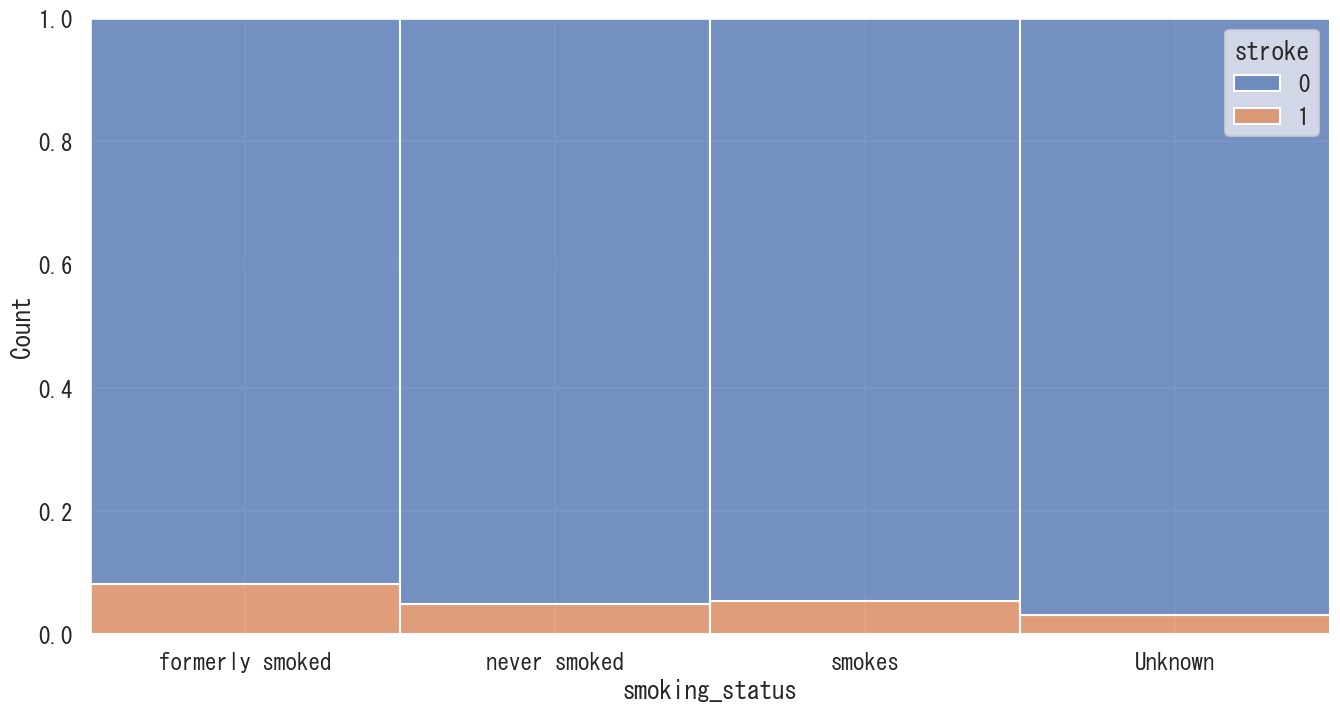

In [10]:
# smoking statusのstroke分布の確認
plt.figure(figsize=(16, 8))
sns.histplot(data=df, x="smoking_status", hue="stroke", multiple="fill")
plt.show()

In [11]:
# 各smoking statusで全体に対するstrokeの割合
for status in df["smoking_status"].unique():
    print(f"{status} => {len(df[(df['smoking_status'] == status) & (df['stroke'] == 1)]) / len(df[df['smoking_status'] == status])}")

formerly smoked => 0.08073817762399077
never smoked => 0.04842219804134929
smokes => 0.05412371134020619
Unknown => 0.03133333333333333


In [12]:
df.groupby("smoking_status")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
smoking_status,,,,,,,,
Unknown,1500.0,30.313547,25.130775,0.08,8.0,23.0,51.25,82.0
formerly smoked,867.0,55.044983,17.710373,10.00,43.0,57.0,70.00,82.0
never smoked,1838.0,47.053319,19.789320,10.00,31.0,47.0,62.00,82.0
smokes,776.0,47.159794,16.462986,10.00,33.0,47.0,59.00,82.0


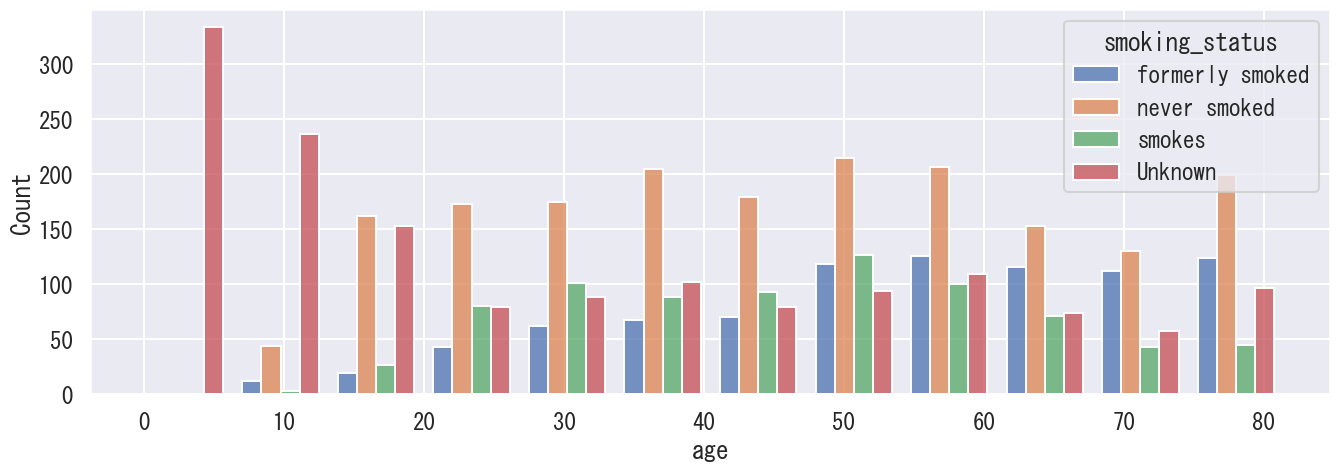

In [13]:
plt.figure(figsize=(16, 5))
sns.histplot(data=df, x="age", hue="smoking_status", multiple="dodge", bins=12, shrink=0.8)
plt.show()

In [14]:
# 20歳未満のUnknownをnever smokedに変更
df.loc[(df["smoking_status"] == "Unknown") & (df["age"] < 20), "smoking_status"] = "never smoked"

In [15]:
for status in df["smoking_status"].unique():
    print(f"{status} => {len(df[(df['smoking_status'] == status) & (df['stroke'] == 1)]) / len(df[df['smoking_status'] == status])}")

formerly smoked => 0.08073817762399077
never smoked => 0.03574234092694423
smokes => 0.05412371134020619
Unknown => 0.056818181818181816


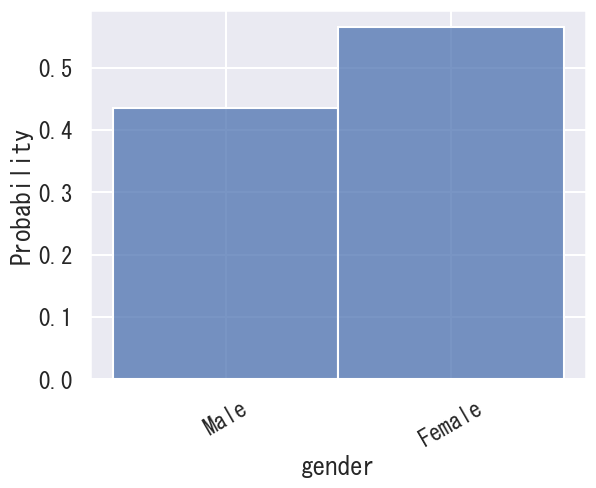

Female    0.583618
Male      0.416382
Name: gender, dtype: float64


C:\Users\kirit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:454: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges[:-1], name="edges"),
C:\Users\kirit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:455: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(np.diff(edges) * shrink, name="widths"),


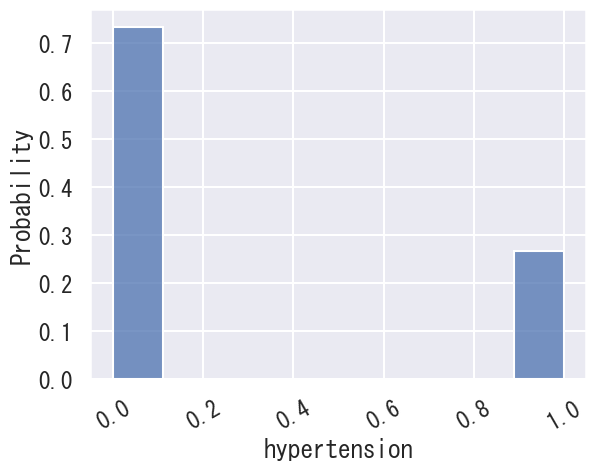

0    0.903835
1    0.096165
Name: hypertension, dtype: float64


C:\Users\kirit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:454: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges[:-1], name="edges"),
C:\Users\kirit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:455: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(np.diff(edges) * shrink, name="widths"),


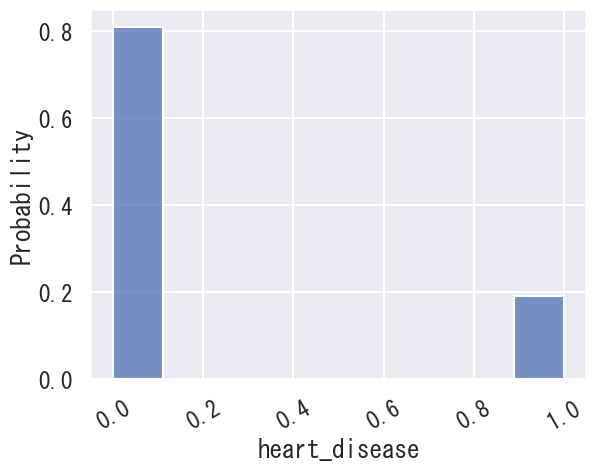

0    0.94479
1    0.05521
Name: heart_disease, dtype: float64


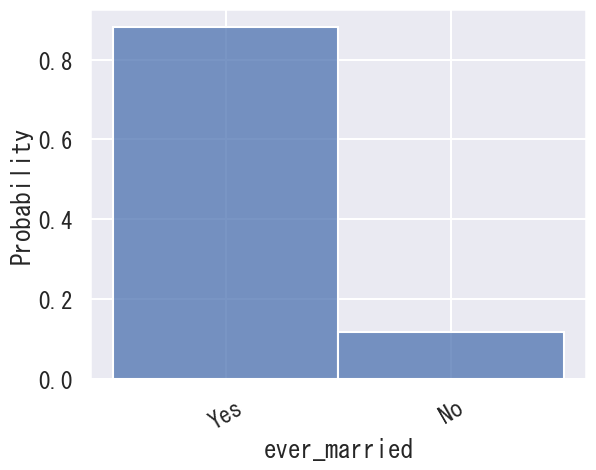

Yes    0.658502
No     0.341498
Name: ever_married, dtype: float64


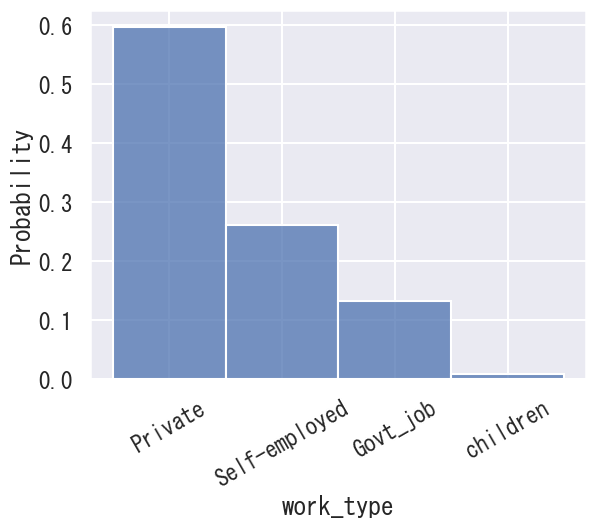

Private          0.574182
Self-employed    0.161413
children         0.135113
Govt_job         0.129291
Name: work_type, dtype: float64


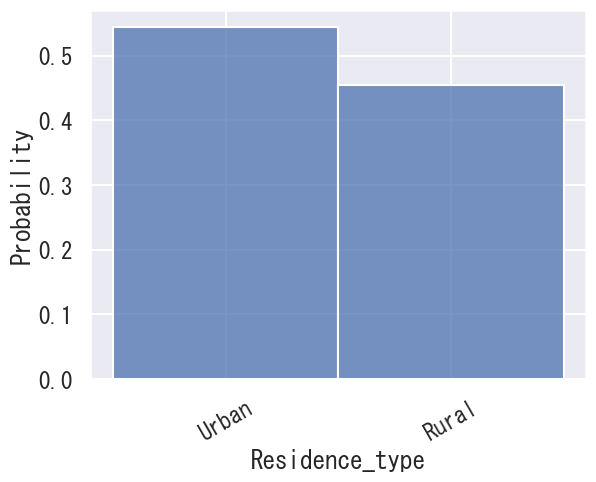

Urban    0.508332
Rural    0.491668
Name: Residence_type, dtype: float64


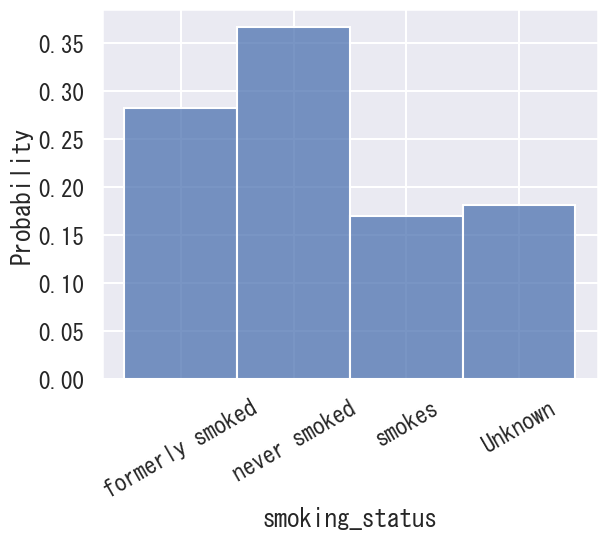

never smoked       0.511142
formerly smoked    0.174061
Unknown            0.159004
smokes             0.155792
Name: smoking_status, dtype: float64


In [16]:
for feature in cat_features:
    sns.histplot(data=df[df["stroke"] == 1], x=feature, stat="probability")
    plt.xticks(rotation=30)
    plt.show()
    print(df[feature].value_counts(normalize=True))

Numerical features

<AxesSubplot:>

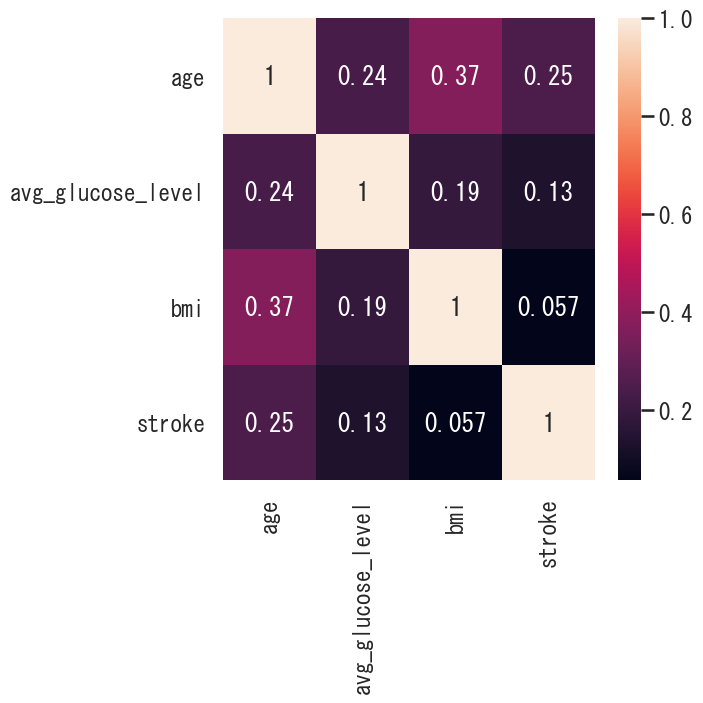

In [17]:
plt.figure(figsize=(6, 6))
sns.heatmap(df[num_features+["stroke"]].corr(), annot=True)

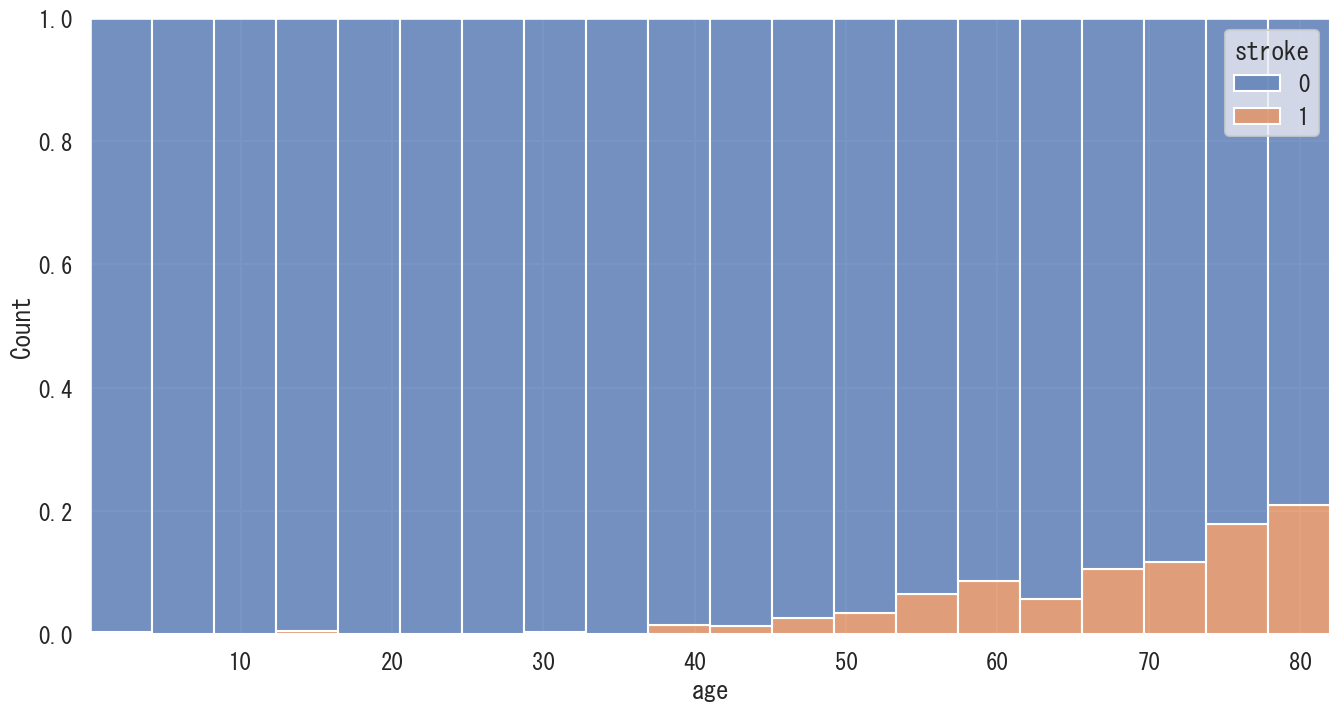

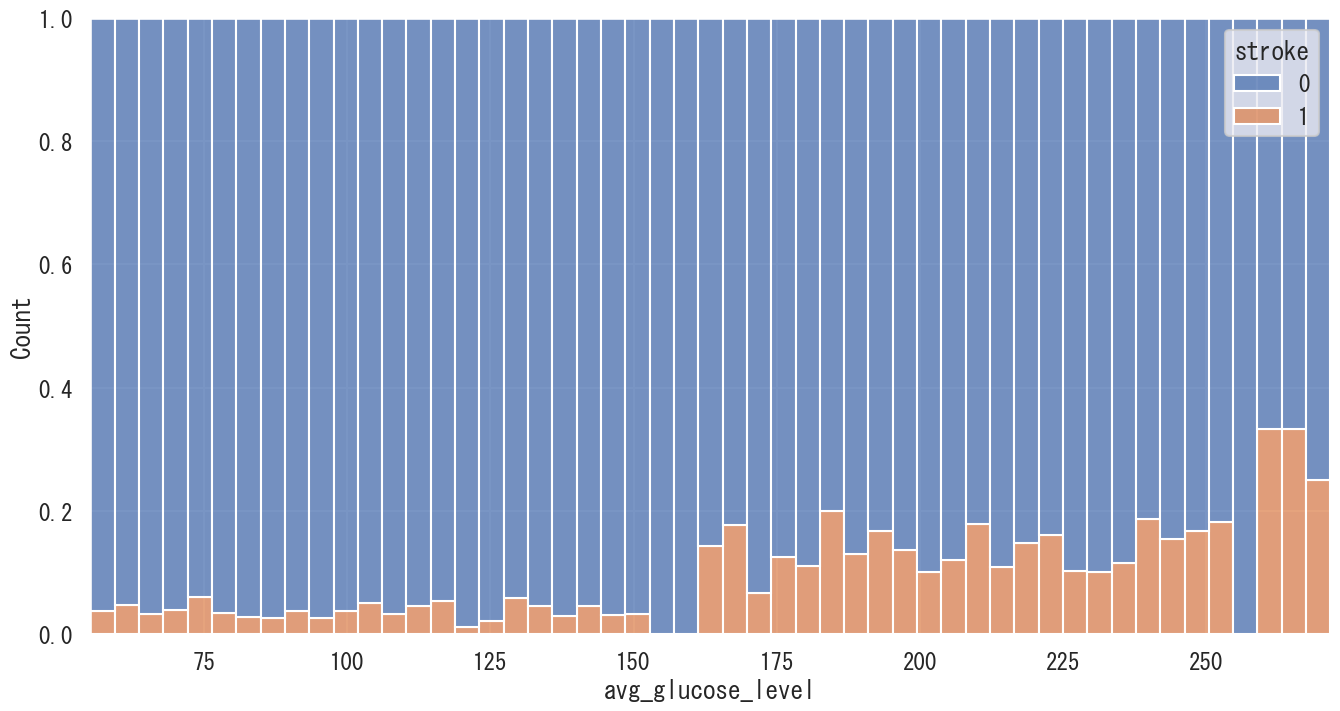

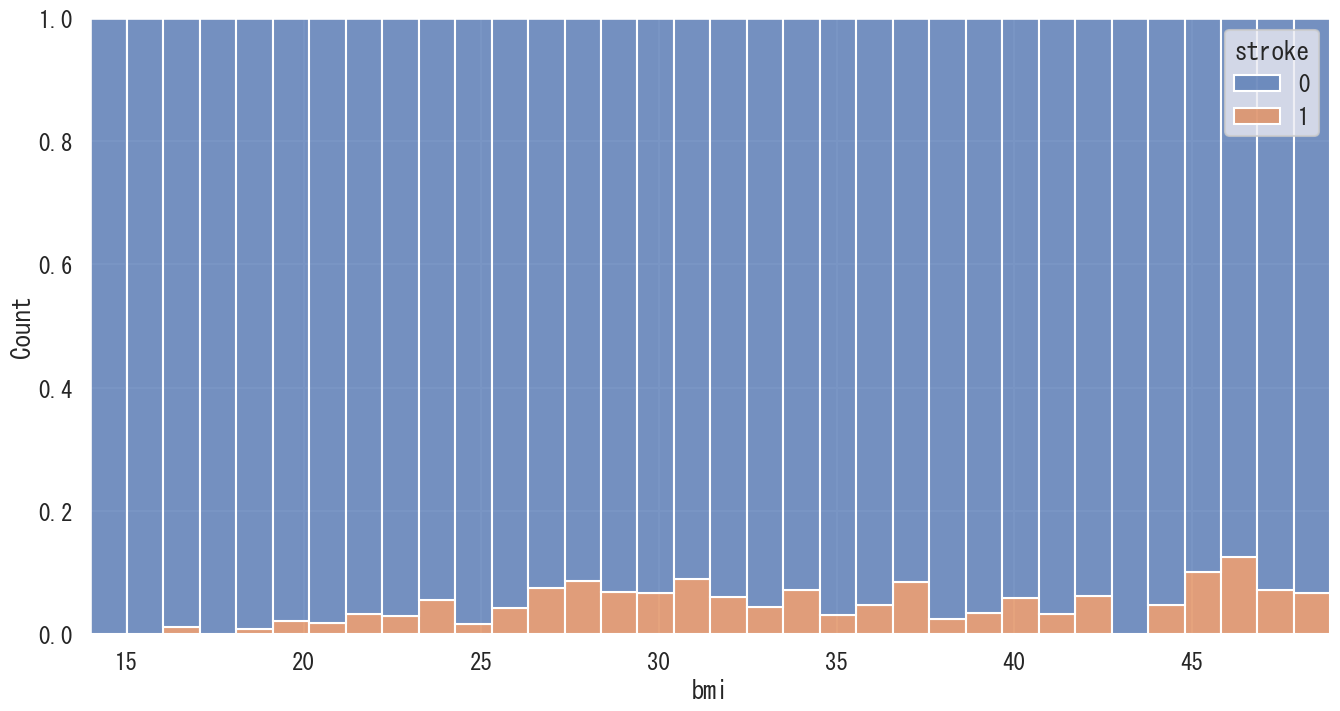

In [18]:
for feature in num_features:
    plt.figure(figsize=(16, 8))
    sns.histplot(data=df, x=feature, hue="stroke", multiple="fill")
    plt.show()

In [19]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Preprocessing

In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [21]:
sc = StandardScaler()
enc = OneHotEncoder(drop="first")

In [22]:
ct = ColumnTransformer(
    [
        ("cat_process", enc, cat_features),
        ("num_process", sc, num_features)
    ],
    remainder="passthrough"
)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [24]:
rf_model = RandomForestClassifier(random_state=17)
lr_model = LogisticRegression(random_state=17)

In [25]:
pipe_r = Pipeline(
    [
        ("preprocess", ct),
        ("classify", rf_model)
    ]
)

In [26]:
pipe_r.named_steps

{'preprocess': ColumnTransformer(remainder='passthrough',
                   transformers=[('cat_process', OneHotEncoder(drop='first'),
                                  ['gender', 'hypertension', 'heart_disease',
                                   'ever_married', 'work_type', 'Residence_type',
                                   'smoking_status']),
                                 ('num_process', StandardScaler(),
                                  ['age', 'avg_glucose_level', 'bmi'])]),
 'classify': RandomForestClassifier(random_state=17)}

In [27]:
from sklearn.model_selection import StratifiedKFold

In [28]:
k = StratifiedKFold(5, shuffle=True, random_state=17)

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
scores_r = cross_val_score(pipe_r, df.iloc[:,:-1], df.iloc[:,-1], cv=k)
scores_r

array([0.94784353, 0.94879518, 0.94779116, 0.95281124, 0.9497992 ])

In [31]:
pipe_l = Pipeline(
    [
        ("preprocess", ct),
        ("classify", lr_model)
    ]
)

In [32]:
scores_l = cross_val_score(pipe_l, df.iloc[:,:-1], df.iloc[:,-1], cv=k)
scores_l

array([0.94984955, 0.9497992 , 0.94879518, 0.95080321, 0.95080321])

Training

In [33]:
X = ct.fit_transform(df.iloc[:,:-1])
y = df.iloc[:,-1]
X[:2]

array([[ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.04058433e+00,
         2.72341090e+00,  1.19323816e+00],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.61427033e+00,
        -5.22766599e-04,  5.89389611e-01]])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=17)

In [35]:
rf_model = RandomForestClassifier(random_state=17)
lr_model = LogisticRegression(random_state=17)

In [36]:
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=17)

In [37]:
pred_r = rf_model.predict(X_test)
pred_l = lr_model.predict(X_test)

In [38]:
rf_model.score(X_test, y_test), lr_model.score(X_test, y_test)

(0.9498495486459378, 0.9498495486459378)

Analyze

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test, pred_r))
print(classification_report(y_test, pred_l))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.50      0.04      0.07        50

    accuracy                           0.95       997
   macro avg       0.73      0.52      0.52       997
weighted avg       0.93      0.95      0.93       997

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997



C:\Users\kirit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kirit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kirit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: Unde

In [41]:
pred_l.sum()

0

In [42]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

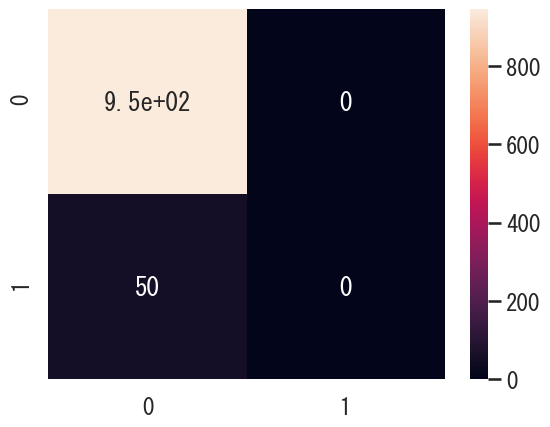

In [43]:
sns.heatmap(confusion_matrix(y_test, pred_l), annot=True)

In [44]:
from sklearn.metrics import precision_recall_curve
prob = rf_model.predict_proba(X_test)
print(prob)
precision, recall, thresh = precision_recall_curve(y_test, prob[:, 1])

[[1.   0.  ]
 [0.64 0.36]
 [0.98 0.02]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]]


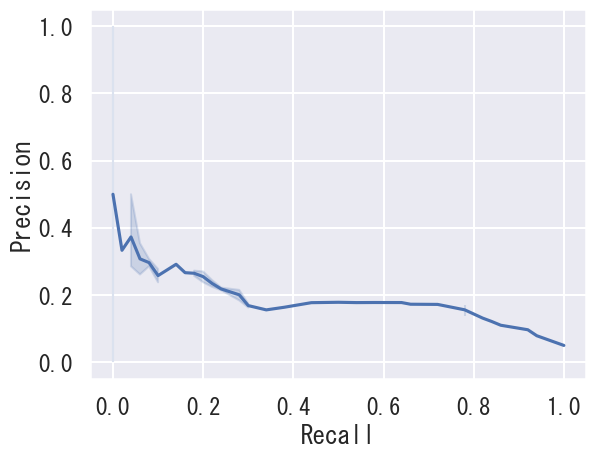

In [45]:
sns.lineplot(x=recall, y=precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [47]:
from imblearn.under_sampling import RandomUnderSampler

In [48]:
undersample = RandomUnderSampler(sampling_strategy="majority")

In [49]:
X_under, y_under = undersample.fit_resample(X, y)

In [50]:
X_under.shape, y_under.shape

((496, 14), (496,))

In [51]:
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_under, y_under, test_size=0.2, stratify=y_under, random_state=17)


In [52]:
X_train_rs.shape, y_train_rs.shape

((396, 14), (396,))

In [54]:
model = RandomForestClassifier(random_state=17)
model.fit(X_train_rs, y_train_rs)
model.score(X_test_rs, y_test_rs)

0.73

In [55]:
pred = model.predict(X_test_rs)

In [56]:
print(classification_report(y_test_rs, pred))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        50
           1       0.69      0.82      0.75        50

    accuracy                           0.73       100
   macro avg       0.74      0.73      0.73       100
weighted avg       0.74      0.73      0.73       100



In [62]:
prob = model.predict_proba(X_test_rs)
precision, recall, threshold = precision_recall_curve(y_test_rs, prob[:, 1])

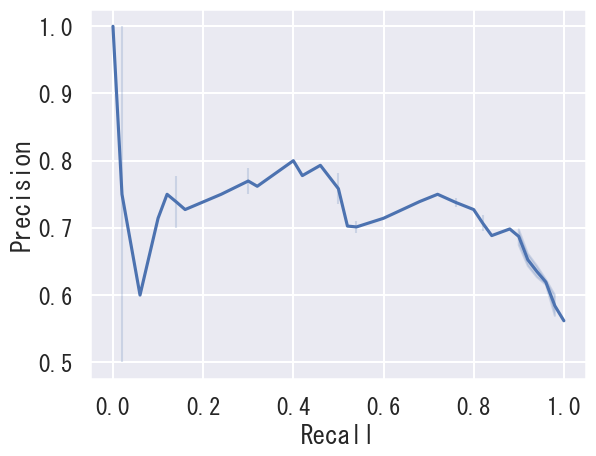

In [63]:
sns.lineplot(x=recall, y=precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [71]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
fpr, tpr, threshold = roc_curve(y_test_rs, prob[:,1])

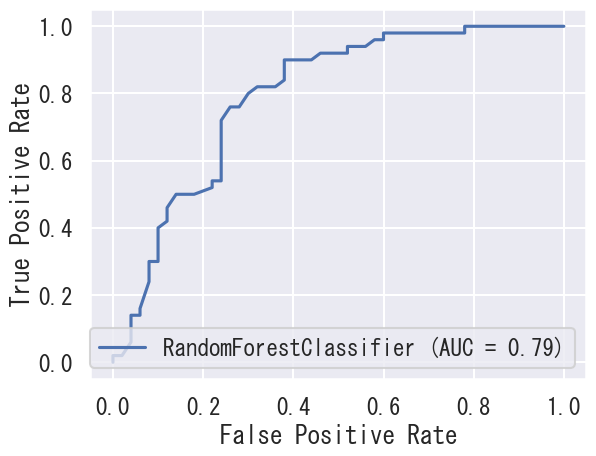

In [74]:
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="RandomForestClassifier")
display.plot()
plt.show()